This jupyter notebook licensed with CC-BY-NC. See https://gitlab.com/awsteiner/ugastro_ipynb/blob/master/LICENSE.md for details.

Teach python basic calculations, plotting, and mathematics:

In [42]:
from math import *
import numpy
import matplotlib.pyplot as plot
import sympy

## Centrifugal force:

Radius of earth in meters

In [43]:
Rearth=6378000

Period of earth in s

In [44]:
Pearth=24*60*60

Knoxville latitude

In [45]:
lat=36*pi/180

<font color="red">Task 1: Using these, compute the acceleration in Knoxville, and compare with 9.8 m/s<sup>2</sup>:</font>

In [46]:
aKnox=0

In [47]:
print(aKnox)

0


## Taylor series

In [48]:
x=sympy.symbols('x')

Create a complicated function, and plot it:

In [49]:
f=sympy.sin(x*20)*sympy.exp(-4*(x-0.5)**2)

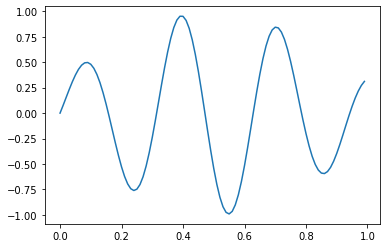

In [50]:
plot.plot([y for y in numpy.arange(0,1.0,0.01)],[f.evalf(subs={x: y}) for y in numpy.arange(0,1.0,0.01)])

In [51]:
f2=sympy.series(f,x,0,2)

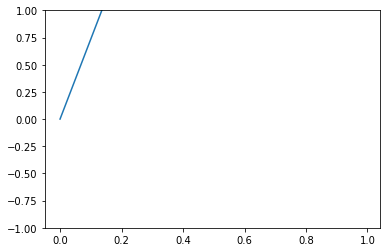

In [52]:
plot.plot([y for y in numpy.arange(0,1.0,0.01)],[f2.removeO().evalf(subs={x: y}) for y in numpy.arange(0,1.0,0.01)])
plot.ylim([-1,1])
plot.show()

<font color="red">Task 2: Insert a new plot just below this line (and before the section on the binomial theorem) going to 40th order in the Taylor series expansion:</font>

In [53]:
f2=sympy.series(f,x,0,40)

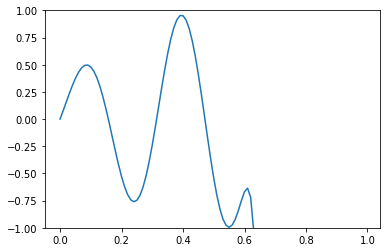

In [54]:
plot.plot([y for y in numpy.arange(0,1.0,0.01)],[f2.removeO().evalf(subs={x: y}) for y in numpy.arange(0,1.0,0.01)])
plot.ylim([-1,1])
plot.show()

## Binomial theorem

In [82]:
x=0.001

The exact result of (1+x)<sup>5</sup>

In [83]:
print((1+x)**(5))

1.0050100100050003


How to compute factorials

In [84]:
fa=factorial(10)

In [85]:
print(fa)

3628800


<font color="red">Task 3: In the cells below, print the result of the first four terms from the binomial theorem:</font>

In [86]:
print(1+5*x+x**2*5*4/2)

1.00501


## Tidal force

In [60]:
r, G, M, m = sympy.symbols('r G M m')

The force on a mass 'm' due to the moon (mass 'M')

In [61]:
F=-G*M*m/r/r

To compute the Taylor series, we need a derivative:

In [62]:
Fprime=sympy.diff(F,r)
display(Fprime)

2*G*M*m/r**3

<font color="red">Task 4: In the cell below, compute and show the second derivative:</font>

In [63]:
Fdoubleprime=1
display(Fdoubleprime)

1

## Tides (with angular dependence)

In [64]:
r, s, theta, phi, R, xi=sympy.symbols('r s theta phi R xi')

In [65]:
iterm=sympy.cos(phi)/s**2-1/r**2

In [66]:
display(iterm)

cos(phi)/s**2 - 1/r**2

In [67]:
iterm2=iterm.subs(s,sympy.sqrt((r-R*sympy.cos(theta))**2+R**2*sympy.sin(theta)**2))

In [68]:
display(iterm2)

cos(phi)/(R**2*sin(theta)**2 + (-R*cos(theta) + r)**2) - 1/r**2

In [69]:
iterm3=iterm2.subs(phi,sympy.asin(R/r*sympy.sin(theta)*
                                  (1+R/r*sympy.cos(theta))))

In [70]:
display(iterm3)

sqrt(-R**2*(R*cos(theta)/r + 1)**2*sin(theta)**2/r**2 + 1)/(R**2*sin(theta)**2 + (-R*cos(theta) + r)**2) - 1/r**2

In [71]:
iterm4=iterm3.subs(R,xi*r)

In [72]:
display(iterm4)

sqrt(-xi**2*(xi*cos(theta) + 1)**2*sin(theta)**2 + 1)/(r**2*xi**2*sin(theta)**2 + (-r*xi*cos(theta) + r)**2) - 1/r**2

In [73]:
iterm5=sympy.series(iterm4,xi,0,2).removeO().subs(xi,R/r)

In [74]:
display(iterm5)

2*R*cos(theta)/r**3

In [75]:
jterm=sympy.sin(phi)/s**2

In [76]:
jterm2=jterm.subs(s,sympy.sqrt((r-R*sympy.cos(theta))**2+R**2*sympy.sin(theta)**2))

In [77]:
jterm3=jterm2.subs(phi,sympy.asin(R/r*sympy.sin(theta)*
                                  (1+R/r*sympy.cos(theta))))

In [78]:
jterm4=jterm3.subs(R,xi*r)

In [79]:
jterm5=sympy.series(jterm4,xi,0,2).removeO().subs(xi,R/r)

In [80]:
display(jterm5)

R*sin(theta)/r**3

(0, 1.2)

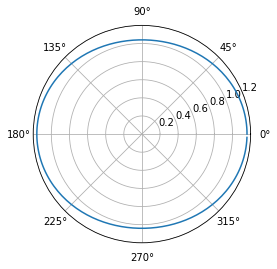

In [81]:
plot.polar([t for t in numpy.arange(0,2*pi,pi/100)],
               [1+0.04*(4*cos(t)**2+sin(t)**2) for t in 
                numpy.arange(0,2*pi,pi/100)])
plot.ylim([0,1.2])

<font color="red">Task 5: In cells below, update the strength of the tides from 0.04 to 0.5 and adjust the upper end of the 'ylimits' to plot more extreme tides:</font>